# Final Project Submission

Florian Salihovic

## Importing Libraries

Libraries used are important at the notebooks head to provide an easy overview of required packages.

In [1]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.tools.plotting import scatter_matrix # data processing, scatter matrix 
import matplotlib.pyplot as plt # plotting

import statsmodels.api as sm # Python module that provides classes and functions for the estimation of many different 
#statistical models, as well as for conducting statistical tests, and statistical data exploration
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns

import folium
from folium.plugins import HeatMap

from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Understanding Business Requirements

### Technical details
R-squared/R-squared adjusted should be between .7 and .9.

## Data Mining

| Key               | Description                                        | Expected Data Type       |
|:------------------|:---------------------------------------------------|:-------------------------|
| id                | unique identified for a house                      | numeric, positive        |
| date              | date house was sold                                | pandas.Timestamp         |
| price             | is prediction target                               | numeric, positive        |
| bedroomsNumber    | number of bedrooms/house                           | numeric, positive        |
| bathroomsNumber   | of bathrooms/bedrooms                              | numeric, positive        |
| sqft_livingsquare | footage of the home                                | numeric, positive        |
| sqft_lotsquare    | footage of the lot                                 | numeric, positive        |
| floorsTotal       | floors (levels) in house                           | numeric, positive        |
| waterfront        | has a view to a waterfront                         | boolean, optional           |
| view              | has been viewed                                    | numeric, positive           |
| condition         | how good the condition is ( overall )              | numeric, positive           |
| grade             | overall grade given to the housing unit, based on King County grading system | numeric, positive |
| sqft_above        | square footage of house apart from basement        | numeric, positive, optional |
| sqft_basement     | square footage of the basement                     | numeric, positive           |
| yr_built          | built year                                         | numeric, positive           |
| yr_renovated      | year when house was renovated                      | numeric, positive, optional |
| zipcode           | zip code                                           | numeric, positive |
| lat               | Latitude coordinate                                | numeric, optional |
| long              | Longitude coordinate                               | numeric, optional |
| sqft_living15     | square footage of interior housing living space for the nearest 15 neighbors | numeric, optional |
| sqft_lot15        | square footage of the land lots of the nearest 15 neighbors | numeric, optional |


##### Additional Credits And Sources
- [Variable Explanation, kaggle.com](https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/23194)
- [King County Home Sales: Analysis and the limitations of a multiple regression model, JuanPablo Murillo, February 23, 2016](https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html)

### Simple File Line Count

Using `wc -l King_County_House_prices_dataset.csv` we get direct feedback over the number of lines in a file. This could be a useful comparison value in case the formatting of the dataset was broken.

In [2]:
!wc -l King_County_House_prices_dataset.csv

   21598 King_County_House_prices_dataset.csv


### Exploring The Dataset With Pandas

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('King_County_House_prices_dataset.csv', delimiter=",")

#### DataFrame: Basic Information

Understanding the values is important as these define the operations we can perform (consistently) on the DataFrame. Basic information about the DataFrame can be obtained by calling [DataFrame.shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html), [DataFrame.info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) and [DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).

In [5]:
rows, columns = df.shape

In [6]:
print("Rows: {}, columns: {}".format(rows, columns))

Rows: 21597, columns: 21


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### DataFrame: Basic Inspections

[DataFrame.head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [DataFrame.tail](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) provide a first glance on the data contained by the DataFrame.

In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [10]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


### Data Cleaning

`date` is a string following the pattern `month/date/year`. It might be useful to convert the value later into a [pandas.Timestamp](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html) as it may provide additional or more useful comparison mechanics.

In [11]:
df['date'] = df['date'].apply(pd.to_datetime)

In [12]:
df['zipcode'] = df['zipcode'].apply(str)

Inspecting the DataFrame we can see the format data rendered of `date` is different. `DataFrame.head` gives a first glance on the modified DataFrame while calling `DataFrame.info` shows the exact data types.

In [13]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(10), object(2)
memory

#### Searching For Null Values

In [15]:
df.isnull().sum().sort_values(ascending=False)

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

Calling `df.isnull().sum().sort_values(ascending=False)` shows the columns which contain undefined/missing values:
- `yr_renovated`
- `waterfront`
- `view`

#### Explaining Null Values

##### yr_renovated

Not every house has been renovated. In some cases, the houses might be too old to take a renovation which has been done more than a decade ago, into consideration - it might also be unknown.

##### waterfront

As `waterfront` usually is a very revaluating ferature, thus I descide the value to be `0.0` when the value is missing in case it might be required in modelling a prediction

##### view

Similar to `waterfront`, `view` can also be revaluating value. This value will also be set to `0.0` in case it s required.

#### Unspecified/Missing Value: `sqft_basement`

In [16]:
df[df['sqft_basement'] == '?']['sqft_basement'].describe()

count     454
unique      1
top         ?
freq      454
Name: sqft_basement, dtype: object

#### Unspecified/Missing Value: `waterfront`

In [17]:
df[df['waterfront'].isna()].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.376000e+03,2.376000e+03,2376.000000,2376.000000,2376.000000,2.376000e+03,2376.000000,0.0,2370.000000,2376.000000,2376.000000,2376.000000,2376.000000,1946.000000,2376.000000,2376.000000,2376.000000,2376.000000
mean,4.484801e+09,5.294301e+05,3.361532,2.105745,2063.341330,1.530689e+04,1.486532,NaN,0.256540,3.408670,7.632576,1766.194865,1970.675084,94.323227,47.561465,-122.213497,1980.507576,12366.675084
std,2.873451e+09,3.250794e+05,0.908079,0.764266,881.380488,4.595495e+04,0.535898,NaN,0.783974,0.652826,1.150238,794.747951,29.302970,423.549734,0.137431,0.140720,689.428551,24694.192000
min,1.000102e+06,8.000000e+04,1.000000,0.750000,430.000000,6.000000e+02,1.000000,NaN,0.000000,1.000000,4.000000,430.000000,1900.000000,0.000000,47.180800,-122.503000,780.000000,788.000000
25%,2.112250e+09,3.228750e+05,3.000000,1.500000,1430.000000,5.031750e+03,1.000000,NaN,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,47.472925,-122.327000,1470.000000,5108.000000
50%,3.789200e+09,4.450000e+05,3.000000,2.250000,1900.000000,7.607000e+03,1.500000,NaN,0.000000,3.000000,7.000000,1550.000000,1973.000000,0.000000,47.571400,-122.228000,1820.000000,7624.500000
75%,7.227501e+09,6.496125e+05,4.000000,2.500000,2520.000000,1.052475e+04,2.000000,NaN,0.000000,4.000000,8.000000,2190.000000,1996.000000,0.000000,47.678000,-122.125750,2370.000000,10001.250000
max,9.839301e+09,3.200000e+06,8.000000,6.500000,7730.000000,1.074218e+06,3.500000,NaN,4.000000,5.000000,12.000000,6660.000000,2015.000000,2015.000000,47.777400,-121.319000,4940.000000,311610.000000


#### Unspecified/Missing Value: `view`

In [18]:
df[df['view'].isna()].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,6.300000e+01,6.300000e+01,63.000000,63.000000,63.000000,63.000000,63.000000,57.000000,0.0,63.000000,63.000000,63.000000,63.000000,51.000000,63.000000,63.000000,63.000000,63.000000
mean,3.938991e+09,6.219582e+05,3.428571,2.154762,2249.174603,18111.571429,1.484127,0.017544,NaN,3.444444,7.825397,1802.031746,1970.111111,39.117647,47.530452,-122.225619,2096.126984,15220.682540
std,2.811234e+09,6.809271e+05,0.892880,0.896261,1117.119720,51631.810542,0.499744,0.132453,NaN,0.616383,1.350504,839.149761,29.317016,279.355877,0.144512,0.137397,719.023004,33298.112833
min,1.045408e+08,1.440000e+05,2.000000,1.000000,890.000000,2159.000000,1.000000,0.000000,NaN,3.000000,6.000000,790.000000,1905.000000,0.000000,47.207800,-122.408000,900.000000,1288.000000
25%,1.845600e+09,3.224750e+05,3.000000,1.750000,1445.000000,5766.500000,1.000000,0.000000,NaN,3.000000,7.000000,1195.000000,1950.000000,0.000000,47.397700,-122.328500,1530.000000,5943.000000
50%,3.448900e+09,4.800000e+05,3.000000,2.250000,2120.000000,7725.000000,1.500000,0.000000,NaN,3.000000,7.000000,1580.000000,1975.000000,0.000000,47.537800,-122.266000,1980.000000,7700.000000
75%,6.021500e+09,6.790000e+05,4.000000,2.500000,2545.000000,10235.500000,2.000000,0.000000,NaN,4.000000,9.000000,2470.000000,1994.000000,0.000000,47.628000,-122.140500,2500.000000,9665.000000
max,9.468200e+09,5.300000e+06,6.000000,6.000000,7390.000000,360241.000000,2.500000,1.000000,NaN,5.000000,12.000000,5000.000000,2014.000000,1995.000000,47.776400,-121.850000,4470.000000,209959.000000


### Data Exploration

#### Prediction Target: `price`

As the price is prediction target, it is relevant to understand the data and find die independent variables.

In [19]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [20]:
import matplotlib.pyplot as plt # plotting

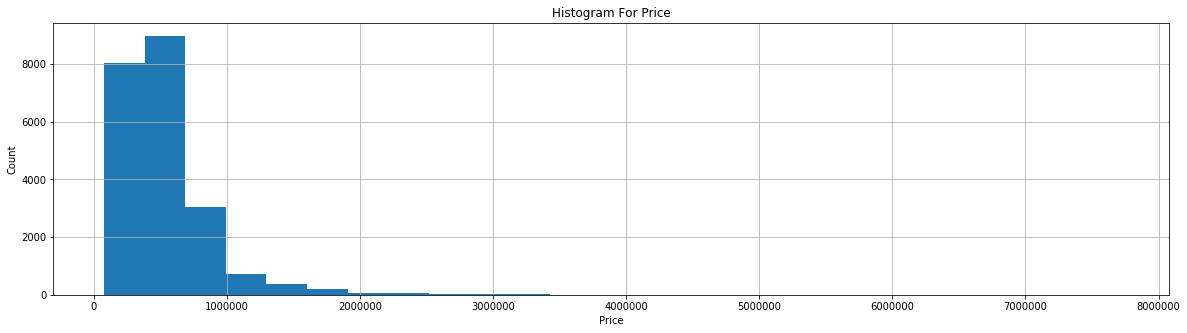

In [21]:
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Histogram For Price')

df['price'].hist(bins=25, figsize=(20, 5));

In [22]:
from numpy.random import normal
import numpy as np
from scipy.stats import norm

In [23]:
μ, σ = norm.fit(df['price'])

In [24]:
print("loc: {}, scale: {}".format(μ, σ))

loc: 540296.5735055795, scale: 367359.634929548


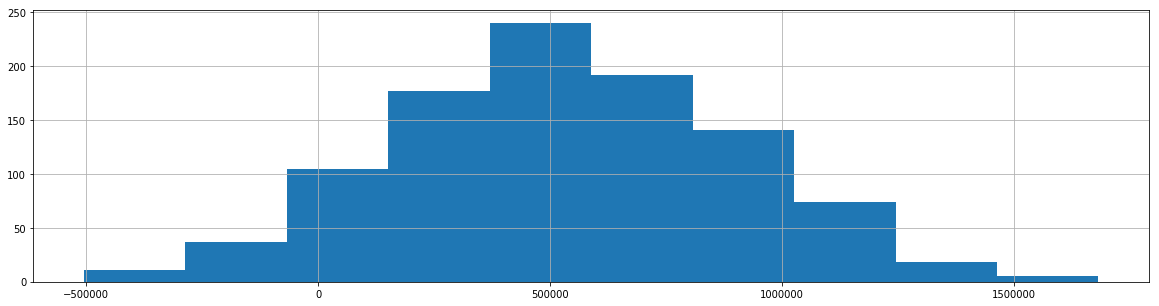

In [25]:
f, ax = plt.subplots(figsize=(20, 5))
pd.Series(normal(loc=μ, scale=σ, size=1000)).hist();

House prices are determined in a naive way by the houses location and its quality. It is therefor interesting to understand, in which district a lot of offers are availble and how the houses are generally distributed.

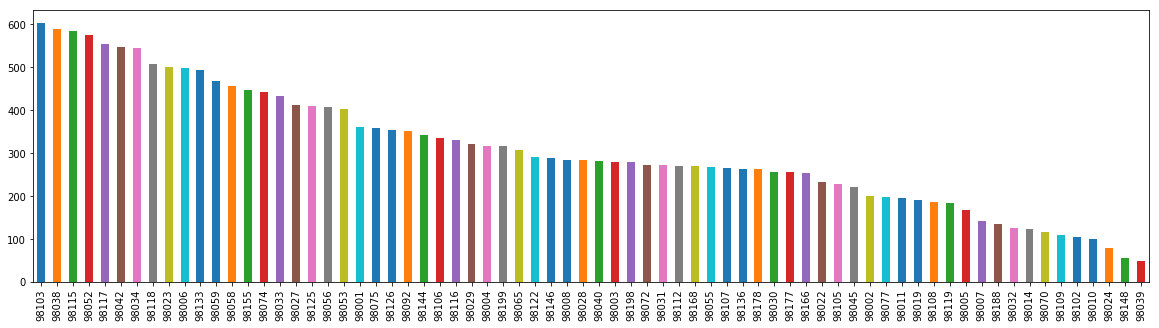

In [26]:
df['zipcode'].value_counts().plot(kind='bar', figsize=(20,5));

#### Finding Correlations

Finding relations between values, or correlations between features is important to get an understanding of which featues might influence the price. Using a correlation matrix simplifies the understanding of corelated values, which influence the price.

In [27]:
def heatmap(matrix):
    """
    Utility function for printing a heatmap with seaborn.
    
    :param matrix: The correlation matrix to print. 
    """
    sns.set(context="paper",
            font="monospace")
    sns.heatmap(matrix,
            annot=True,
            vmax=1,
            vmin=.2,
            cmap=sns.diverging_palette(255, 10, as_cmap=True),
            square=True,
            linewidths=.2);

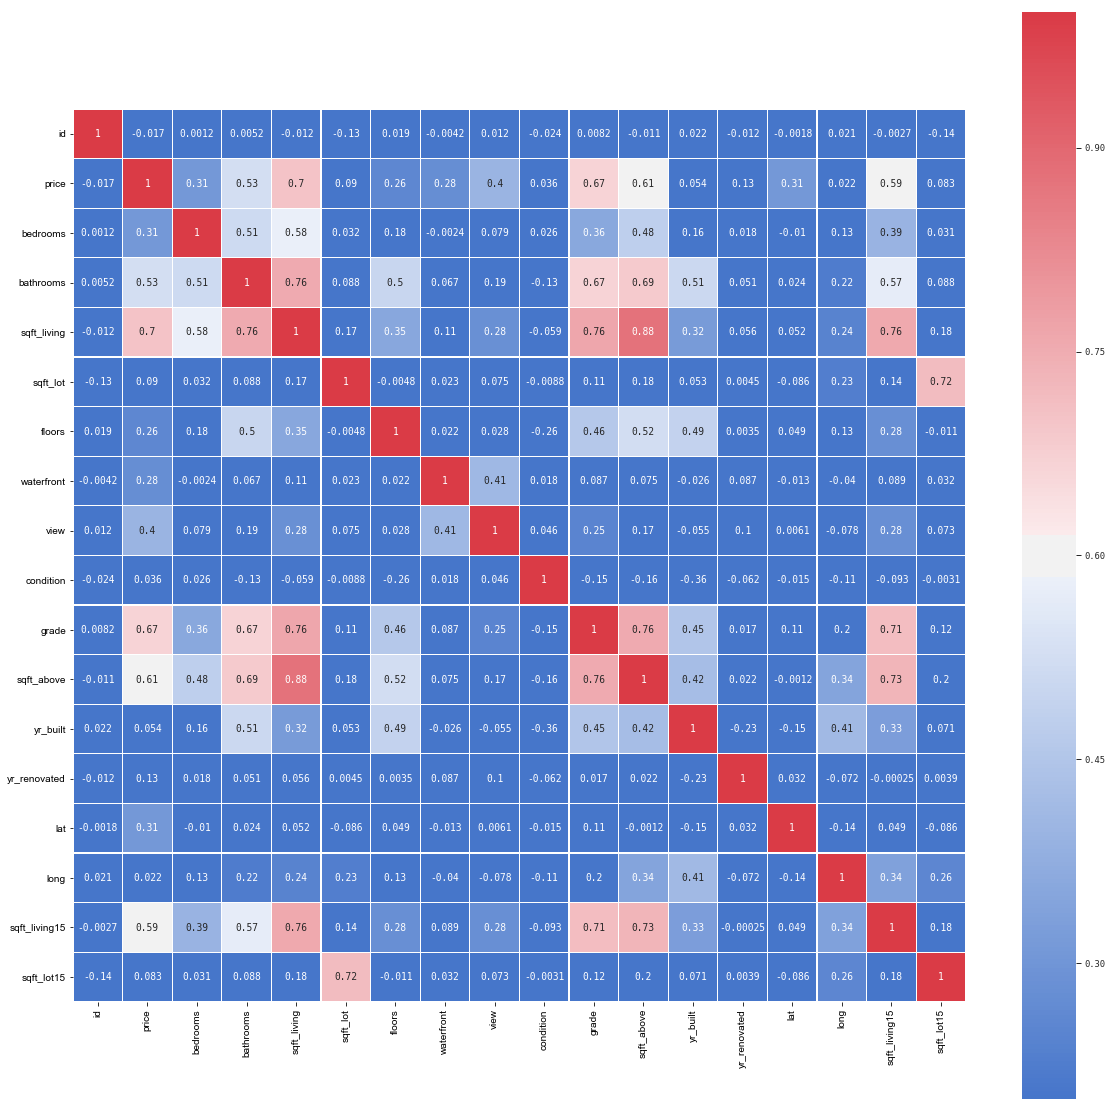

In [28]:
f, ax = plt.subplots(figsize=(20, 20))
heatmap(df.corr())

The correlation matrix shows nicely, how several features are related with each other. Strong correlations stand out while it is easy to recognize, which features are not releated to each other at all.

#### Correlations For Price

As `price` is the dependent variable, a dedicated view on price is rendered to identify features of interest easily. 

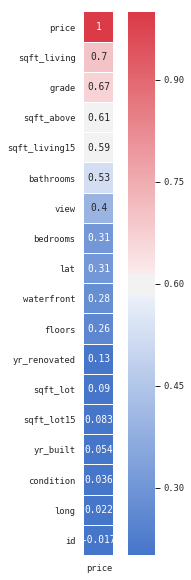

In [29]:
f, ax = plt.subplots(figsize=(5, 10))
heatmap(df.corr()[['price']].sort_values(by=['price'], ascending=False));

Features which appear to be good house price predictors are

| Feature       | Correlation Value|
|:--------------|-----------------:|
| sqft_living   | .7               |
| grade         | .67              |
| sqft_above    | .61              |
| sqft_living15 | .59              |
| bathrooms     | .53              |

In [30]:
special_map = folium.Map(location=[df.iloc[0]['lat'], df.iloc[0]['long']])

HeatMap(data=df[['lat', 'long', 'price']]
        .groupby(['lat', 'long'])
        .sum()
        .reset_index()
        .values.tolist(),
        radius=8,
        zoom_start=1,
        max_zoom=13).add_to(special_map);

In [31]:
special_map

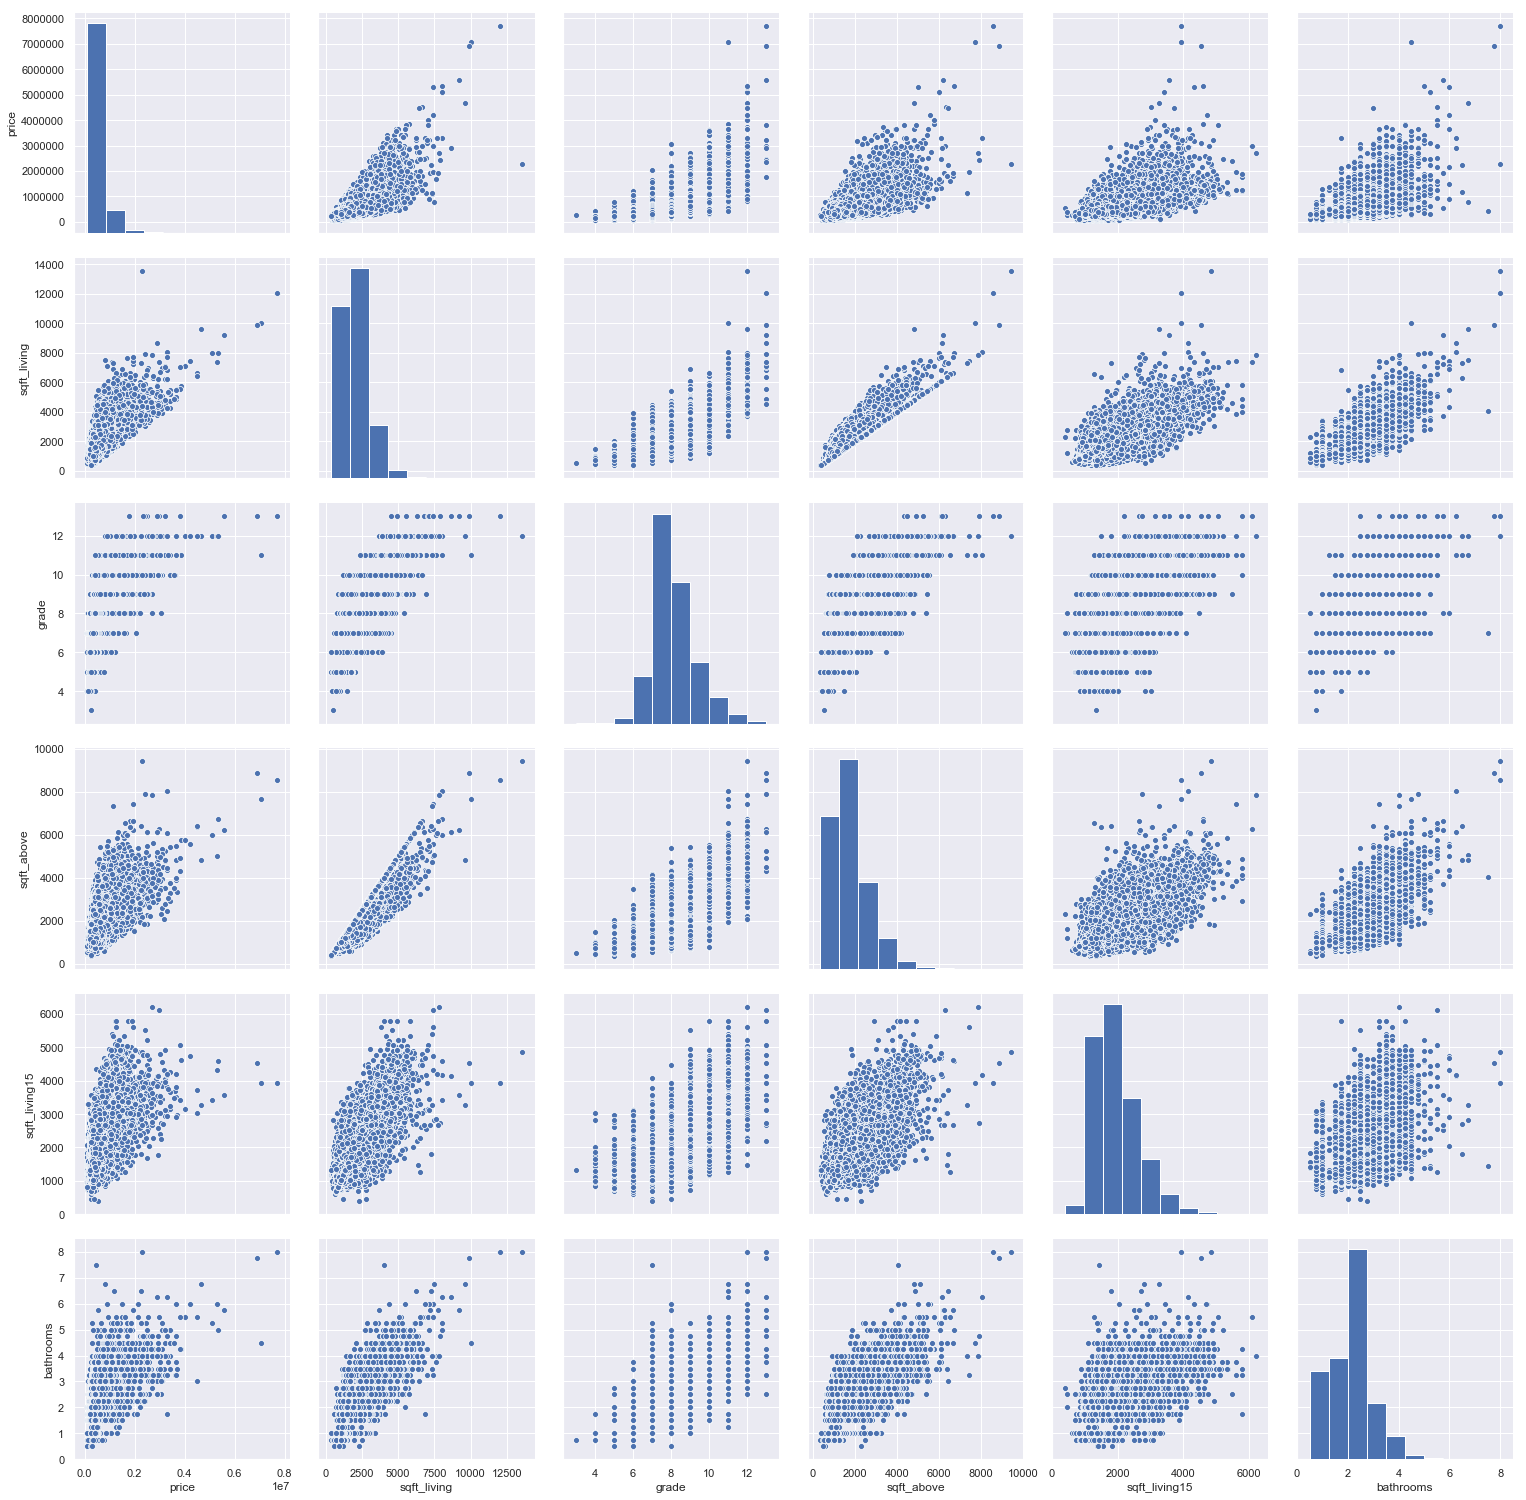

In [32]:
sns.set()
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']
sns.pairplot(df[cols], height = 3.5)
plt.show();

In [ ]:
var = 'grade'
data = pd.concat([df_houseprices['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='price', data=data)
fig.axis(ymin=0, ymax=600000);
plt.xticks(rotation=90);

### Feature Engineering

### Predictive Modelling